In [14]:
import warnings
warnings.filterwarnings("ignore")

import readPlotOptionSurface 
import modulesForCalibration as mfc

import matplotlib.pyplot as plt

Parameters

In [15]:
# Parameters
alpha = 1.5
eta = 0.2
    
n = 12

# Model
model = 'GBM'

# risk free rate
r = 0.0245
# dividend rate
q = 0.005
# spot price
S0 = 190.3


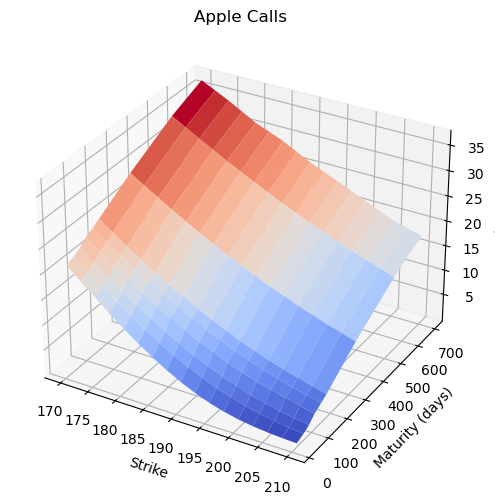

In [16]:
maturities, strikes, callPrices = readPlotOptionSurface.readNPlot()

In [17]:
maturities_years

array([0.06849315, 0.16438356, 0.24109589, 0.31780822, 0.41369863,
       0.49041096, 0.91232877, 1.48767123, 1.90958904])

In [18]:
maturities

array([ 25,  60,  88, 116, 151, 179, 333, 543, 697], dtype=int64)

In [19]:
strikes

array([170. , 172.5, 175. , 177.5, 180. , 182.5, 185. , 187.5, 190. ,
       192.5, 195. , 197.5, 200. , 202.5, 205. , 207.5, 210. ])

In [20]:
marketPrices = callPrices
maturities_years = maturities/365.0

# select strike and maturity & corresponding option price
T_days = maturities[4]
T = maturities_years[4]
K = strikes[8]
c = callPrices[4][6]

print("For maturity T=%d(days) and strike K=%d, call price is %2.3f" %(T_days, K, c))


For maturity T=151(days) and strike K=190, call price is 13.750


In [11]:
sigArray = []
cArray = []


# implied volatility via grid search
# just for illustrative purposes
# there are much more efficient ways of doing it
eMin = 1.0e6
for sig in mfc.myRange(0.01,0.40,0.005):
    
    params = []
    params.append(sig)
    
    km, cT_km = mfc.genericFFT(params, S0, K, r, q, T, alpha, eta, n, model)
    cHat = cT_km[0]
    
    sigArray.append(sig)
    cArray.append(cHat)
    
    e = abs(cHat-c)
    if (e < eMin):
        eMin = e
        impliedVol = sig
        #print(eMin)
        #print(impliedVol)
        #print(' ')
    
print('Implied vol = ' + str(impliedVol))

Implied vol = 0.2650000000000001


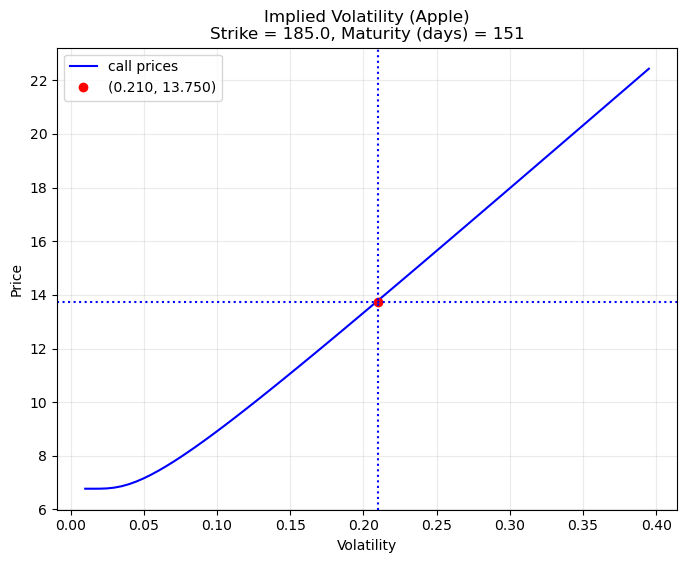

In [11]:
#plot
fig = plt.figure(figsize=(8,6))
plt.plot(sigArray, cArray, 'b')
plt.plot(impliedVol, c, 'ro')
plt.axhline(y=c, color='b', linestyle=':')
plt.axvline(x=impliedVol, color='b', linestyle=':')
plt.grid(alpha=0.25)
plt.xlabel('Volatility')
plt.ylabel('Price')
plt.title('Implied Volatility (Apple)\nStrike = %1.1f, Maturity (days) = %i' % (K, T_days))
leg = ['call prices', '(%1.3f, %1.3f)' % (impliedVol, c)]
plt.legend(leg)
#plt.savefig('impliedVolCall.png')
plt.show()